# Import Libralies

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Load data

In [2]:
data_train = pd.read_csv('train.csv',index_col = 'Id')
data_test = pd.read_csv('test.csv',index_col = 'Id')

data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Set Screen to see all output

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)

# Intro explore the data

In [4]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Check NaN values, in this notebook I will show percent of NaN values.

In [5]:
#Check percent of null values.

for i in data_train.columns:
    print(i,'have null values',(data_train[i].isnull().sum())/len(data_train[i]*100),'%')

MSSubClass have null values 0.0 %
MSZoning have null values 0.0 %
LotFrontage have null values 0.1773972602739726 %
LotArea have null values 0.0 %
Street have null values 0.0 %
Alley have null values 0.9376712328767123 %
LotShape have null values 0.0 %
LandContour have null values 0.0 %
Utilities have null values 0.0 %
LotConfig have null values 0.0 %
LandSlope have null values 0.0 %
Neighborhood have null values 0.0 %
Condition1 have null values 0.0 %
Condition2 have null values 0.0 %
BldgType have null values 0.0 %
HouseStyle have null values 0.0 %
OverallQual have null values 0.0 %
OverallCond have null values 0.0 %
YearBuilt have null values 0.0 %
YearRemodAdd have null values 0.0 %
RoofStyle have null values 0.0 %
RoofMatl have null values 0.0 %
Exterior1st have null values 0.0 %
Exterior2nd have null values 0.0 %
MasVnrType have null values 0.005479452054794521 %
MasVnrArea have null values 0.005479452054794521 %
ExterQual have null values 0.0 %
ExterCond have null values 0.0 %
F

From above, I found 'Alley', 'PoolQC', 'Fence' and 'MiscFeature' 
have more than 80% null values. Then I drop these 2 columns

In [6]:
data_train = data_train.drop([ 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
data_test = data_test.drop([ 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Spit data to numerical and categorical columns

In [7]:
numerical_cols = [cname for cname in data_train.columns if 
                data_train[cname].dtype in ['int64', 'float64']]

#Numerical columns
categorical_cols = [cname for cname in data_train.columns if
                    data_train[cname].dtype == "object"]

Explore the categorical columns

Check values in catagorical columns 

In [8]:

for i in data_train[categorical_cols]:
    print(i,'has values',data_train[i].unique(),'amount is',data_train[i].nunique())

MSZoning has values ['RL' 'RM' 'C (all)' 'FV' 'RH'] amount is 5
Street has values ['Pave' 'Grvl'] amount is 2
LotShape has values ['Reg' 'IR1' 'IR2' 'IR3'] amount is 4
LandContour has values ['Lvl' 'Bnk' 'Low' 'HLS'] amount is 4
Utilities has values ['AllPub' 'NoSeWa'] amount is 2
LotConfig has values ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] amount is 5
LandSlope has values ['Gtl' 'Mod' 'Sev'] amount is 3
Neighborhood has values ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] amount is 25
Condition1 has values ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] amount is 9
Condition2 has values ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] amount is 8
BldgType has values ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] amount is 5
HouseStyle has values ['2Story' '1

From above, 'Exterior1st' has values more than 10 values.Then columns 'Exterior1st' will be dropped.

In [9]:
data_train = data_train.drop(['Exterior1st'], axis=1)
data_test = data_test.drop(['Exterior1st'], axis=1)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Explore numerical columns

In [10]:
data_train[numerical_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [11]:
data_train[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data_train.isnull().sum()

# Cleaning data and Proprocessing

Before Cleaning data, We should declare it.

In [12]:
X = data_train.drop(['SalePrice'], axis=1)
y = data_train['SalePrice']

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')



# Preprocessing for numerical data
for cname in X.columns:
    if X[cname].dtype in ['int64', 'float64'] :
        X[cname] = num_imputer.fit_transform(X[[cname]])
for cname in data_test.columns:
    if data_test[cname].dtype in ['int64', 'float64'] :
        data_test[cname] = num_imputer.fit_transform(data_test[[cname]]) 
            
# Preprocessing for categorical data
for cname in X.columns:
     if X[cname].dtype == "object":
            X[cname] = cat_imputer.fit_transform(X[[cname]])
        
for cname in data_test.columns:
    if data_test[cname].dtype == "object":
        data_test[cname] = cat_imputer.fit_transform(data_test[[cname]])

In [18]:
#Rearrange columns
numerical_cols = [cname for cname in X.columns if 
                data_train[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"]
X = X[numerical_cols + categorical_cols]
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [19]:
#Rearrange columns for test data

data_test = data_test[numerical_cols + categorical_cols]
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1462,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1463,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
1464,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
1465,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


# Get Dummies Variables

In [21]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [22]:
data_test = pd.get_dummies(data_test, drop_first = True)
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1462,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1463,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1464,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1465,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [23]:
real_col = []

for i in X.columns.values:
    for j in data_test.columns.values:
        if i == j:
            real_col.append(i)

real_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighbo

In [24]:
len(real_col)

208

In [25]:
X_adjusted = X[real_col]
data_test_adjusted = data_test[real_col]

In [26]:
colll = pd.DataFrame({'X_col':[i for i in X_adjusted.columns.values],
                     'test_col':[i for i in data_test_adjusted.columns.values]})
colll

,X_col,test_col
0,MSSubClass,MSSubClass
1,LotFrontage,LotFrontage
2,LotArea,LotArea
3,OverallQual,OverallQual
4,OverallCond,OverallCond
5,YearBuilt,YearBuilt
6,YearRemodAdd,YearRemodAdd
7,MasVnrArea,MasVnrArea
8,BsmtFinSF1,BsmtFinSF1
9,BsmtFinSF2,BsmtFinSF2


In [27]:
print(X_adjusted.shape)
print(data_test_adjusted.shape)

(1460, 208)
(1459, 208)


# PCA 

Before using PCA, I have standardize data to same scale.

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_adjusted)
data_test_scaled = scaler.fit_transform(data_test_adjusted)

In [29]:
pca = PCA(n_components=X_adjusted.shape[1])
pca.fit_transform(X_scaled)


array([[ 4.23034120e+00, -1.65309559e+00, -8.35132031e-01, ...,
         1.60652072e-02,  4.16770366e-14,  4.05150560e-15],
       [ 1.01150618e-01,  3.43476945e+00, -1.63363784e-01, ...,
        -7.91566147e-04,  4.85225468e-15,  2.61107625e-16],
       [ 4.95651885e+00, -7.53684130e-01, -2.60325211e-03, ...,
         4.28710992e-02,  5.00142789e-15, -1.15247175e-16],
       ...,
       [ 2.98246920e-01, -1.68637663e+00,  3.55357672e+00, ...,
        -1.38573160e-02, -6.58211545e-16, -7.11131883e-17],
       [-2.95095674e+00,  3.85633044e+00, -1.89975716e+00, ...,
        -7.89563150e-02,  9.10850331e-16, -2.69159959e-17],
       [-1.64652579e+00,  3.48798746e+00, -1.25196040e+00, ...,
        -1.99249014e-03, -1.06235747e-17, -4.62106562e-17]])

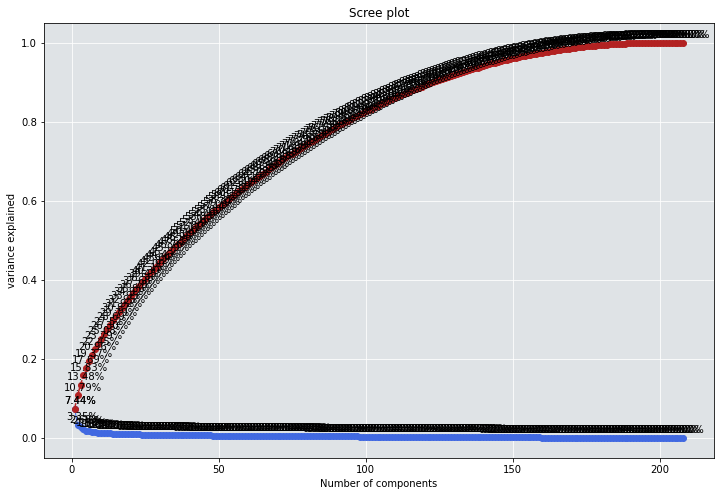

In [30]:
explain_ratio = pca.explained_variance_ratio_
explain_ratio_cum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (12, 8))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.xlabel('Number of components')
plt.ylabel('variance explained')
plt.title('Scree plot')

#Plotting
plt.plot(range(1, explain_ratio.shape[0] + 1), 
         explain_ratio, c = 'royalblue', marker = 'o', linewidth = 1, label = 'Individual')
plt.plot(range(1, explain_ratio.shape[0] + 1),
         explain_ratio_cum, c = 'firebrick', marker = 'o', linestyle = '--', label = 'Cumulative')

#Adding values to plot
for x, ex_ratio, ex_ratio_cum in zip(range(1, explain_ratio.shape[0] + 1),
                                     explain_ratio,
                                     explain_ratio_cum):
  ex_ratio_label = f'{ex_ratio * 100:.2f}%'
  plt.annotate(ex_ratio_label, (x, ex_ratio), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')
  ex_ratio_cum_label = f'{ex_ratio_cum * 100:.2f}%'
  plt.annotate(ex_ratio_cum_label, (x, ex_ratio_cum), textcoords = 'offset points',
               xytext = (5, 5), ha = 'center')

plt.show()

In [31]:
pca_data = pd.DataFrame({'n_components':[i for i in range(1, explain_ratio.shape[0] + 1)],
                        'PCA' : explain_ratio_cum })

In [32]:
pca_data

,n_components,PCA
0,1,0.074414
1,2,0.107917
2,3,0.134784
3,4,0.158280
4,5,0.176906
5,6,0.193716
6,7,0.209593
7,8,0.224492
8,9,0.237872
9,10,0.250750


According from data frame, using n_components = 144 can explanin varaince = 95 %, then I selected n_components = 144

In [33]:
new_pca = PCA(n_components=144)
X_pca = new_pca.fit_transform(X_scaled)
data_test_pca = new_pca.transform(data_test_scaled) 

# Import Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size = 0.25, random_state = 0)

In [35]:
print(X_train.shape)
print(y_train.shape)

(1095, 144)
(1095,)


# Import model 

In [39]:
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_1 = CatBoostRegressor()
model_2 = ElasticNet() 
def find_best_model(X, y):
    for model in [model_1, model_2]:
        cvs = -1*cross_val_score(model, X, y, cv=5,  scoring='neg_mean_absolute_error')
        print('{0} MAE is {1}'.format(model,cvs.mean()))
  
    
find_best_model(X_train, y_train)

Learning rate set to 0.038121
0:	learn: 78011.9021022	total: 27.7ms	remaining: 27.7s
1:	learn: 76705.2301308	total: 50.6ms	remaining: 25.2s
2:	learn: 75268.5185600	total: 72.8ms	remaining: 24.2s
3:	learn: 73884.3008051	total: 97.5ms	remaining: 24.3s
4:	learn: 72576.1512488	total: 116ms	remaining: 23s
5:	learn: 71226.3888829	total: 135ms	remaining: 22.4s
6:	learn: 69835.0920555	total: 156ms	remaining: 22.1s
7:	learn: 68663.6239815	total: 179ms	remaining: 22.3s
8:	learn: 67326.5896701	total: 206ms	remaining: 22.7s
9:	learn: 66265.8962950	total: 231ms	remaining: 22.9s
10:	learn: 65087.5179352	total: 258ms	remaining: 23.2s
11:	learn: 63970.2886953	total: 286ms	remaining: 23.6s
12:	learn: 62763.3461770	total: 312ms	remaining: 23.7s
13:	learn: 61511.8743865	total: 338ms	remaining: 23.8s
14:	learn: 60422.8445443	total: 360ms	remaining: 23.6s
15:	learn: 59331.1117679	total: 384ms	remaining: 23.6s
16:	learn: 58402.3108100	total: 412ms	remaining: 23.8s
17:	learn: 57503.0965184	total: 439ms	remai

153:	learn: 21255.6199134	total: 4.52s	remaining: 24.8s
154:	learn: 21220.3373876	total: 4.56s	remaining: 24.9s
155:	learn: 21124.4386081	total: 4.59s	remaining: 24.9s
156:	learn: 21035.1248571	total: 4.63s	remaining: 24.9s
157:	learn: 20935.8602647	total: 4.65s	remaining: 24.8s
158:	learn: 20837.5084307	total: 4.68s	remaining: 24.8s
159:	learn: 20755.3787944	total: 4.71s	remaining: 24.7s
160:	learn: 20682.2524262	total: 4.76s	remaining: 24.8s
161:	learn: 20585.2529967	total: 4.79s	remaining: 24.8s
162:	learn: 20480.9357432	total: 4.82s	remaining: 24.7s
163:	learn: 20422.6531887	total: 4.84s	remaining: 24.7s
164:	learn: 20339.3190473	total: 4.87s	remaining: 24.7s
165:	learn: 20254.5655142	total: 4.9s	remaining: 24.6s
166:	learn: 20191.3095014	total: 4.93s	remaining: 24.6s
167:	learn: 20087.1206696	total: 4.97s	remaining: 24.6s
168:	learn: 19998.1918774	total: 4.99s	remaining: 24.6s
169:	learn: 19923.0020988	total: 5.03s	remaining: 24.5s
170:	learn: 19830.2772751	total: 5.05s	remaining:

301:	learn: 11639.3751937	total: 9.66s	remaining: 22.3s
302:	learn: 11599.3942227	total: 9.69s	remaining: 22.3s
303:	learn: 11551.5153125	total: 9.71s	remaining: 22.2s
304:	learn: 11513.2641610	total: 9.74s	remaining: 22.2s
305:	learn: 11472.7289925	total: 9.77s	remaining: 22.1s
306:	learn: 11443.6060577	total: 9.79s	remaining: 22.1s
307:	learn: 11404.2046427	total: 9.82s	remaining: 22.1s
308:	learn: 11351.5270299	total: 9.86s	remaining: 22s
309:	learn: 11304.3893760	total: 9.88s	remaining: 22s
310:	learn: 11257.5997163	total: 9.91s	remaining: 22s
311:	learn: 11214.2898340	total: 9.94s	remaining: 21.9s
312:	learn: 11170.2116747	total: 9.97s	remaining: 21.9s
313:	learn: 11131.0037688	total: 10s	remaining: 21.9s
314:	learn: 11090.6535955	total: 10s	remaining: 21.8s
315:	learn: 11045.9644363	total: 10.1s	remaining: 21.8s
316:	learn: 11012.0363781	total: 10.1s	remaining: 21.7s
317:	learn: 10976.7533034	total: 10.1s	remaining: 21.7s
318:	learn: 10936.1871354	total: 10.1s	remaining: 21.6s
31

452:	learn: 6618.8504487	total: 14s	remaining: 16.9s
453:	learn: 6603.7747582	total: 14s	remaining: 16.8s
454:	learn: 6583.3566205	total: 14s	remaining: 16.8s
455:	learn: 6564.3038206	total: 14.1s	remaining: 16.8s
456:	learn: 6533.1346658	total: 14.1s	remaining: 16.7s
457:	learn: 6504.3111283	total: 14.1s	remaining: 16.7s
458:	learn: 6478.9263527	total: 14.2s	remaining: 16.7s
459:	learn: 6455.9472914	total: 14.2s	remaining: 16.7s
460:	learn: 6431.6008437	total: 14.2s	remaining: 16.6s
461:	learn: 6406.7424317	total: 14.3s	remaining: 16.6s
462:	learn: 6375.3561153	total: 14.3s	remaining: 16.6s
463:	learn: 6346.4709113	total: 14.3s	remaining: 16.5s
464:	learn: 6324.6718321	total: 14.4s	remaining: 16.5s
465:	learn: 6301.7330420	total: 14.4s	remaining: 16.5s
466:	learn: 6278.8368756	total: 14.4s	remaining: 16.5s
467:	learn: 6250.4172991	total: 14.5s	remaining: 16.4s
468:	learn: 6227.0707191	total: 14.5s	remaining: 16.4s
469:	learn: 6206.9533624	total: 14.5s	remaining: 16.4s
470:	learn: 6190

609:	learn: 3799.7295196	total: 19s	remaining: 12.2s
610:	learn: 3788.4174276	total: 19s	remaining: 12.1s
611:	learn: 3772.7248659	total: 19.1s	remaining: 12.1s
612:	learn: 3760.5827072	total: 19.1s	remaining: 12.1s
613:	learn: 3747.5856433	total: 19.1s	remaining: 12s
614:	learn: 3732.3818149	total: 19.1s	remaining: 12s
615:	learn: 3716.6832994	total: 19.2s	remaining: 11.9s
616:	learn: 3699.4188418	total: 19.2s	remaining: 11.9s
617:	learn: 3686.4488908	total: 19.2s	remaining: 11.9s
618:	learn: 3675.4266591	total: 19.3s	remaining: 11.9s
619:	learn: 3662.1119202	total: 19.3s	remaining: 11.8s
620:	learn: 3655.4037858	total: 19.3s	remaining: 11.8s
621:	learn: 3639.9766009	total: 19.3s	remaining: 11.7s
622:	learn: 3626.6110321	total: 19.3s	remaining: 11.7s
623:	learn: 3610.5277964	total: 19.4s	remaining: 11.7s
624:	learn: 3601.8087515	total: 19.4s	remaining: 11.6s
625:	learn: 3589.8727215	total: 19.4s	remaining: 11.6s
626:	learn: 3576.0664877	total: 19.5s	remaining: 11.6s
627:	learn: 3560.4

759:	learn: 2362.4559260	total: 23.6s	remaining: 7.44s
760:	learn: 2352.8350685	total: 23.6s	remaining: 7.41s
761:	learn: 2343.1355547	total: 23.6s	remaining: 7.37s
762:	learn: 2338.1953260	total: 23.6s	remaining: 7.34s
763:	learn: 2330.3544839	total: 23.6s	remaining: 7.3s
764:	learn: 2322.2149659	total: 23.7s	remaining: 7.27s
765:	learn: 2319.4128057	total: 23.7s	remaining: 7.24s
766:	learn: 2312.0985513	total: 23.7s	remaining: 7.21s
767:	learn: 2305.0052770	total: 23.8s	remaining: 7.18s
768:	learn: 2296.4198441	total: 23.8s	remaining: 7.14s
769:	learn: 2290.1196885	total: 23.8s	remaining: 7.11s
770:	learn: 2282.5418331	total: 23.8s	remaining: 7.08s
771:	learn: 2277.6611811	total: 23.9s	remaining: 7.05s
772:	learn: 2272.1856670	total: 23.9s	remaining: 7.01s
773:	learn: 2264.5824426	total: 23.9s	remaining: 6.98s
774:	learn: 2259.9246567	total: 23.9s	remaining: 6.95s
775:	learn: 2252.3528238	total: 24s	remaining: 6.92s
776:	learn: 2246.0469353	total: 24s	remaining: 6.89s
777:	learn: 224

915:	learn: 1485.2118515	total: 27.7s	remaining: 2.54s
916:	learn: 1479.9125585	total: 27.8s	remaining: 2.51s
917:	learn: 1476.4177933	total: 27.8s	remaining: 2.48s
918:	learn: 1472.9449006	total: 27.8s	remaining: 2.45s
919:	learn: 1468.3606077	total: 27.8s	remaining: 2.42s
920:	learn: 1463.7872141	total: 27.9s	remaining: 2.39s
921:	learn: 1459.4037374	total: 27.9s	remaining: 2.36s
922:	learn: 1455.8453078	total: 27.9s	remaining: 2.33s
923:	learn: 1451.9870673	total: 27.9s	remaining: 2.3s
924:	learn: 1448.5079040	total: 27.9s	remaining: 2.27s
925:	learn: 1443.9461016	total: 28s	remaining: 2.23s
926:	learn: 1440.9721523	total: 28s	remaining: 2.21s
927:	learn: 1437.4564370	total: 28.1s	remaining: 2.18s
928:	learn: 1433.0571073	total: 28.1s	remaining: 2.15s
929:	learn: 1428.3901366	total: 28.1s	remaining: 2.12s
930:	learn: 1426.1789287	total: 28.2s	remaining: 2.09s
931:	learn: 1421.4251121	total: 28.2s	remaining: 2.06s
932:	learn: 1414.7352290	total: 28.2s	remaining: 2.03s
933:	learn: 141

70:	learn: 32262.2991124	total: 1.95s	remaining: 25.5s
71:	learn: 31978.5138291	total: 1.97s	remaining: 25.4s
72:	learn: 31869.2299382	total: 2s	remaining: 25.4s
73:	learn: 31686.4608398	total: 2.02s	remaining: 25.3s
74:	learn: 31535.9899191	total: 2.05s	remaining: 25.3s
75:	learn: 31239.4956379	total: 2.07s	remaining: 25.2s
76:	learn: 31080.4324396	total: 2.1s	remaining: 25.1s
77:	learn: 30835.8154635	total: 2.12s	remaining: 25s
78:	learn: 30746.4728262	total: 2.14s	remaining: 25s
79:	learn: 30554.0776682	total: 2.17s	remaining: 25s
80:	learn: 30399.4531110	total: 2.19s	remaining: 24.9s
81:	learn: 30181.2079523	total: 2.21s	remaining: 24.8s
82:	learn: 29966.0520419	total: 2.24s	remaining: 24.7s
83:	learn: 29760.5367830	total: 2.26s	remaining: 24.7s
84:	learn: 29599.6251569	total: 2.29s	remaining: 24.6s
85:	learn: 29407.1825864	total: 2.31s	remaining: 24.6s
86:	learn: 29168.8156313	total: 2.34s	remaining: 24.5s
87:	learn: 28956.9239199	total: 2.37s	remaining: 24.5s
88:	learn: 28810.122

223:	learn: 15538.6927821	total: 5.67s	remaining: 19.6s
224:	learn: 15492.5737878	total: 5.69s	remaining: 19.6s
225:	learn: 15439.6930143	total: 5.71s	remaining: 19.6s
226:	learn: 15366.9249434	total: 5.74s	remaining: 19.5s
227:	learn: 15298.4274592	total: 5.76s	remaining: 19.5s
228:	learn: 15235.0098731	total: 5.79s	remaining: 19.5s
229:	learn: 15177.5915875	total: 5.81s	remaining: 19.4s
230:	learn: 15124.0163683	total: 5.84s	remaining: 19.4s
231:	learn: 15049.9184653	total: 5.87s	remaining: 19.4s
232:	learn: 14991.3476531	total: 5.89s	remaining: 19.4s
233:	learn: 14924.3774152	total: 5.92s	remaining: 19.4s
234:	learn: 14845.1962410	total: 5.94s	remaining: 19.3s
235:	learn: 14813.5523761	total: 5.96s	remaining: 19.3s
236:	learn: 14759.4802807	total: 5.99s	remaining: 19.3s
237:	learn: 14675.0381710	total: 6.01s	remaining: 19.2s
238:	learn: 14619.6163127	total: 6.04s	remaining: 19.2s
239:	learn: 14572.6181825	total: 6.06s	remaining: 19.2s
240:	learn: 14539.1182451	total: 6.08s	remaining

374:	learn: 8696.6544475	total: 9.36s	remaining: 15.6s
375:	learn: 8674.2334470	total: 9.38s	remaining: 15.6s
376:	learn: 8650.5658665	total: 9.41s	remaining: 15.5s
377:	learn: 8615.3298500	total: 9.43s	remaining: 15.5s
378:	learn: 8581.3885076	total: 9.45s	remaining: 15.5s
379:	learn: 8551.0885620	total: 9.48s	remaining: 15.5s
380:	learn: 8518.5331057	total: 9.5s	remaining: 15.4s
381:	learn: 8490.7241905	total: 9.53s	remaining: 15.4s
382:	learn: 8441.3985476	total: 9.55s	remaining: 15.4s
383:	learn: 8402.7344622	total: 9.58s	remaining: 15.4s
384:	learn: 8380.0490647	total: 9.61s	remaining: 15.4s
385:	learn: 8350.3880543	total: 9.63s	remaining: 15.3s
386:	learn: 8318.8876457	total: 9.66s	remaining: 15.3s
387:	learn: 8303.1596296	total: 9.68s	remaining: 15.3s
388:	learn: 8271.8299761	total: 9.71s	remaining: 15.2s
389:	learn: 8253.3550325	total: 9.74s	remaining: 15.2s
390:	learn: 8216.7131895	total: 9.77s	remaining: 15.2s
391:	learn: 8184.3148874	total: 9.79s	remaining: 15.2s
392:	learn:

533:	learn: 5071.5017495	total: 13.3s	remaining: 11.6s
534:	learn: 5059.5203062	total: 13.3s	remaining: 11.6s
535:	learn: 5041.6830719	total: 13.3s	remaining: 11.6s
536:	learn: 5022.6599364	total: 13.4s	remaining: 11.5s
537:	learn: 4999.4973498	total: 13.4s	remaining: 11.5s
538:	learn: 4986.6919744	total: 13.4s	remaining: 11.5s
539:	learn: 4972.6773140	total: 13.4s	remaining: 11.4s
540:	learn: 4957.3890419	total: 13.5s	remaining: 11.4s
541:	learn: 4938.5551671	total: 13.5s	remaining: 11.4s
542:	learn: 4924.4853312	total: 13.5s	remaining: 11.4s
543:	learn: 4905.9121533	total: 13.5s	remaining: 11.3s
544:	learn: 4895.4333401	total: 13.6s	remaining: 11.3s
545:	learn: 4880.5610626	total: 13.6s	remaining: 11.3s
546:	learn: 4865.4536699	total: 13.6s	remaining: 11.3s
547:	learn: 4854.8186060	total: 13.6s	remaining: 11.2s
548:	learn: 4844.3310802	total: 13.7s	remaining: 11.2s
549:	learn: 4827.0422672	total: 13.7s	remaining: 11.2s
550:	learn: 4809.7907927	total: 13.7s	remaining: 11.2s
551:	learn

690:	learn: 3129.7550700	total: 17.4s	remaining: 7.78s
691:	learn: 3126.9073888	total: 17.4s	remaining: 7.75s
692:	learn: 3125.9986799	total: 17.4s	remaining: 7.72s
693:	learn: 3125.1020821	total: 17.5s	remaining: 7.7s
694:	learn: 3119.5070253	total: 17.5s	remaining: 7.67s
695:	learn: 3110.2329932	total: 17.5s	remaining: 7.65s
696:	learn: 3104.0594107	total: 17.5s	remaining: 7.62s
697:	learn: 3090.4272574	total: 17.6s	remaining: 7.59s
698:	learn: 3076.5553386	total: 17.6s	remaining: 7.57s
699:	learn: 3067.9293776	total: 17.6s	remaining: 7.55s
700:	learn: 3058.1290867	total: 17.6s	remaining: 7.52s
701:	learn: 3046.0801856	total: 17.7s	remaining: 7.49s
702:	learn: 3034.9671982	total: 17.7s	remaining: 7.47s
703:	learn: 3025.9592217	total: 17.7s	remaining: 7.44s
704:	learn: 3020.7358375	total: 17.7s	remaining: 7.42s
705:	learn: 3010.8720764	total: 17.7s	remaining: 7.39s
706:	learn: 2998.2559698	total: 17.8s	remaining: 7.37s
707:	learn: 2987.2327697	total: 17.8s	remaining: 7.34s
708:	learn:

841:	learn: 1986.8493987	total: 21.3s	remaining: 3.99s
842:	learn: 1978.9982233	total: 21.3s	remaining: 3.96s
843:	learn: 1971.9828505	total: 21.3s	remaining: 3.94s
844:	learn: 1967.5630800	total: 21.3s	remaining: 3.91s
845:	learn: 1964.4049877	total: 21.3s	remaining: 3.89s
846:	learn: 1961.0417476	total: 21.4s	remaining: 3.86s
847:	learn: 1953.2523800	total: 21.4s	remaining: 3.83s
848:	learn: 1946.5160441	total: 21.4s	remaining: 3.81s
849:	learn: 1943.2073376	total: 21.4s	remaining: 3.78s
850:	learn: 1938.5711398	total: 21.5s	remaining: 3.76s
851:	learn: 1938.2158375	total: 21.5s	remaining: 3.73s
852:	learn: 1932.1354672	total: 21.5s	remaining: 3.71s
853:	learn: 1926.0615076	total: 21.5s	remaining: 3.68s
854:	learn: 1920.0254775	total: 21.6s	remaining: 3.66s
855:	learn: 1918.1169303	total: 21.6s	remaining: 3.63s
856:	learn: 1911.3224847	total: 21.6s	remaining: 3.61s
857:	learn: 1905.8748590	total: 21.6s	remaining: 3.58s
858:	learn: 1899.2044229	total: 21.7s	remaining: 3.56s
859:	learn

995:	learn: 1278.7662422	total: 25s	remaining: 101ms
996:	learn: 1272.6227724	total: 25.1s	remaining: 75.4ms
997:	learn: 1269.6449812	total: 25.1s	remaining: 50.3ms
998:	learn: 1266.9776187	total: 25.1s	remaining: 25.1ms
999:	learn: 1266.7386863	total: 25.1s	remaining: 0us
Learning rate set to 0.038121
0:	learn: 75328.0205992	total: 28.3ms	remaining: 28.2s
1:	learn: 74101.1870933	total: 52.4ms	remaining: 26.2s
2:	learn: 72496.1932410	total: 73.6ms	remaining: 24.5s
3:	learn: 70961.8019411	total: 97.6ms	remaining: 24.3s
4:	learn: 69944.8600748	total: 118ms	remaining: 23.5s
5:	learn: 68564.7020314	total: 139ms	remaining: 23s
6:	learn: 67312.9786474	total: 163ms	remaining: 23.1s
7:	learn: 65990.2982730	total: 183ms	remaining: 22.7s
8:	learn: 64896.2013913	total: 210ms	remaining: 23.2s
9:	learn: 63807.6465931	total: 233ms	remaining: 23.1s
10:	learn: 62598.0433740	total: 255ms	remaining: 23s
11:	learn: 61537.1129483	total: 277ms	remaining: 22.8s
12:	learn: 60403.9870095	total: 297ms	remainin

147:	learn: 19946.9372972	total: 3.67s	remaining: 21.1s
148:	learn: 19834.5799337	total: 3.7s	remaining: 21.1s
149:	learn: 19734.1511930	total: 3.72s	remaining: 21.1s
150:	learn: 19629.4750898	total: 3.75s	remaining: 21.1s
151:	learn: 19500.5372004	total: 3.77s	remaining: 21s
152:	learn: 19420.3995368	total: 3.79s	remaining: 21s
153:	learn: 19323.3573161	total: 3.82s	remaining: 21s
154:	learn: 19261.9275382	total: 3.84s	remaining: 20.9s
155:	learn: 19156.3066310	total: 3.87s	remaining: 20.9s
156:	learn: 19060.9703165	total: 3.9s	remaining: 20.9s
157:	learn: 18972.1413735	total: 3.92s	remaining: 20.9s
158:	learn: 18895.1926215	total: 3.94s	remaining: 20.9s
159:	learn: 18826.9323323	total: 3.96s	remaining: 20.8s
160:	learn: 18739.3029583	total: 3.99s	remaining: 20.8s
161:	learn: 18665.5726826	total: 4.01s	remaining: 20.8s
162:	learn: 18588.9269314	total: 4.04s	remaining: 20.7s
163:	learn: 18528.4384929	total: 4.06s	remaining: 20.7s
164:	learn: 18454.9825416	total: 4.08s	remaining: 20.7s


296:	learn: 11141.5373065	total: 7.31s	remaining: 17.3s
297:	learn: 11105.8213728	total: 7.33s	remaining: 17.3s
298:	learn: 11064.8531824	total: 7.36s	remaining: 17.2s
299:	learn: 11009.3650255	total: 7.38s	remaining: 17.2s
300:	learn: 10961.8808457	total: 7.41s	remaining: 17.2s
301:	learn: 10934.7357898	total: 7.43s	remaining: 17.2s
302:	learn: 10901.4850286	total: 7.45s	remaining: 17.1s
303:	learn: 10858.0292758	total: 7.47s	remaining: 17.1s
304:	learn: 10802.4399954	total: 7.5s	remaining: 17.1s
305:	learn: 10766.7939161	total: 7.52s	remaining: 17.1s
306:	learn: 10718.4571040	total: 7.54s	remaining: 17s
307:	learn: 10673.0173969	total: 7.57s	remaining: 17s
308:	learn: 10622.6123167	total: 7.59s	remaining: 17s
309:	learn: 10578.6631915	total: 7.62s	remaining: 17s
310:	learn: 10533.9601982	total: 7.64s	remaining: 16.9s
311:	learn: 10497.6660161	total: 7.66s	remaining: 16.9s
312:	learn: 10447.7217633	total: 7.69s	remaining: 16.9s
313:	learn: 10421.1704746	total: 7.72s	remaining: 16.9s
3

454:	learn: 6314.7790142	total: 11.2s	remaining: 13.4s
455:	learn: 6290.5751327	total: 11.2s	remaining: 13.4s
456:	learn: 6266.6475802	total: 11.2s	remaining: 13.3s
457:	learn: 6244.3875611	total: 11.3s	remaining: 13.3s
458:	learn: 6223.9711014	total: 11.3s	remaining: 13.3s
459:	learn: 6200.8690542	total: 11.3s	remaining: 13.3s
460:	learn: 6175.2172202	total: 11.3s	remaining: 13.2s
461:	learn: 6149.2850195	total: 11.4s	remaining: 13.2s
462:	learn: 6123.9073255	total: 11.4s	remaining: 13.2s
463:	learn: 6100.5808534	total: 11.4s	remaining: 13.2s
464:	learn: 6074.6579072	total: 11.4s	remaining: 13.2s
465:	learn: 6042.7229625	total: 11.5s	remaining: 13.1s
466:	learn: 6013.2720289	total: 11.5s	remaining: 13.1s
467:	learn: 5998.7326688	total: 11.5s	remaining: 13.1s
468:	learn: 5969.9720011	total: 11.5s	remaining: 13s
469:	learn: 5955.6177137	total: 11.5s	remaining: 13s
470:	learn: 5932.2511190	total: 11.6s	remaining: 13s
471:	learn: 5919.3246108	total: 11.6s	remaining: 13s
472:	learn: 5896.5

605:	learn: 3777.6030801	total: 14.9s	remaining: 9.71s
606:	learn: 3766.0471286	total: 15s	remaining: 9.68s
607:	learn: 3758.4870890	total: 15s	remaining: 9.66s
608:	learn: 3748.4960849	total: 15s	remaining: 9.63s
609:	learn: 3738.1037527	total: 15s	remaining: 9.61s
610:	learn: 3720.6094927	total: 15.1s	remaining: 9.58s
611:	learn: 3708.9714442	total: 15.1s	remaining: 9.56s
612:	learn: 3693.5163729	total: 15.1s	remaining: 9.54s
613:	learn: 3682.8214351	total: 15.1s	remaining: 9.52s
614:	learn: 3671.1542503	total: 15.2s	remaining: 9.49s
615:	learn: 3657.8143987	total: 15.2s	remaining: 9.47s
616:	learn: 3645.3927982	total: 15.2s	remaining: 9.44s
617:	learn: 3639.8750023	total: 15.2s	remaining: 9.42s
618:	learn: 3627.8985522	total: 15.3s	remaining: 9.41s
619:	learn: 3617.9153743	total: 15.3s	remaining: 9.39s
620:	learn: 3605.3948588	total: 15.3s	remaining: 9.37s
621:	learn: 3593.2421092	total: 15.4s	remaining: 9.34s
622:	learn: 3579.3103673	total: 15.4s	remaining: 9.31s
623:	learn: 3563.0

759:	learn: 2339.1361930	total: 18.8s	remaining: 5.93s
760:	learn: 2333.2198364	total: 18.8s	remaining: 5.91s
761:	learn: 2329.0090230	total: 18.8s	remaining: 5.88s
762:	learn: 2322.7471155	total: 18.9s	remaining: 5.86s
763:	learn: 2315.2186305	total: 18.9s	remaining: 5.83s
764:	learn: 2306.4835442	total: 18.9s	remaining: 5.81s
765:	learn: 2301.2115876	total: 18.9s	remaining: 5.78s
766:	learn: 2294.2193638	total: 19s	remaining: 5.76s
767:	learn: 2285.3940470	total: 19s	remaining: 5.73s
768:	learn: 2276.9117258	total: 19s	remaining: 5.71s
769:	learn: 2269.3218406	total: 19s	remaining: 5.68s
770:	learn: 2259.8335027	total: 19.1s	remaining: 5.66s
771:	learn: 2253.8652214	total: 19.1s	remaining: 5.64s
772:	learn: 2249.1819711	total: 19.1s	remaining: 5.61s
773:	learn: 2242.5179374	total: 19.1s	remaining: 5.59s
774:	learn: 2236.8200794	total: 19.2s	remaining: 5.56s
775:	learn: 2226.6651985	total: 19.2s	remaining: 5.54s
776:	learn: 2218.8783172	total: 19.2s	remaining: 5.51s
777:	learn: 2211.1

916:	learn: 1439.7316489	total: 22.8s	remaining: 2.06s
917:	learn: 1434.8663556	total: 22.8s	remaining: 2.04s
918:	learn: 1432.4326878	total: 22.9s	remaining: 2.01s
919:	learn: 1428.1692968	total: 22.9s	remaining: 1.99s
920:	learn: 1424.9305864	total: 22.9s	remaining: 1.96s
921:	learn: 1419.9460347	total: 22.9s	remaining: 1.94s
922:	learn: 1417.4377110	total: 22.9s	remaining: 1.91s
923:	learn: 1413.7439991	total: 23s	remaining: 1.89s
924:	learn: 1410.0537767	total: 23s	remaining: 1.86s
925:	learn: 1407.8061815	total: 23s	remaining: 1.84s
926:	learn: 1404.9001421	total: 23s	remaining: 1.81s
927:	learn: 1401.4916009	total: 23.1s	remaining: 1.79s
928:	learn: 1398.5707082	total: 23.1s	remaining: 1.76s
929:	learn: 1392.7037741	total: 23.1s	remaining: 1.74s
930:	learn: 1388.6082340	total: 23.1s	remaining: 1.72s
931:	learn: 1386.3111966	total: 23.2s	remaining: 1.69s
932:	learn: 1382.9186704	total: 23.2s	remaining: 1.67s
933:	learn: 1379.3378197	total: 23.2s	remaining: 1.64s
934:	learn: 1374.1

70:	learn: 31302.3775997	total: 1.77s	remaining: 23.2s
71:	learn: 31108.4588417	total: 1.8s	remaining: 23.2s
72:	learn: 30842.1405189	total: 1.82s	remaining: 23.2s
73:	learn: 30629.6622713	total: 1.85s	remaining: 23.2s
74:	learn: 30466.6215786	total: 1.87s	remaining: 23.1s
75:	learn: 30170.5018998	total: 1.9s	remaining: 23.1s
76:	learn: 30037.2847756	total: 1.92s	remaining: 23s
77:	learn: 29793.8733441	total: 1.94s	remaining: 23s
78:	learn: 29678.7602426	total: 1.97s	remaining: 23s
79:	learn: 29436.8573087	total: 1.99s	remaining: 22.9s
80:	learn: 29289.2080954	total: 2.02s	remaining: 22.9s
81:	learn: 29162.6514363	total: 2.04s	remaining: 22.9s
82:	learn: 28999.1307478	total: 2.07s	remaining: 22.8s
83:	learn: 28765.2882404	total: 2.09s	remaining: 22.8s
84:	learn: 28587.2750783	total: 2.11s	remaining: 22.8s
85:	learn: 28343.5883933	total: 2.13s	remaining: 22.7s
86:	learn: 28136.8583799	total: 2.16s	remaining: 22.7s
87:	learn: 27990.5375090	total: 2.18s	remaining: 22.6s
88:	learn: 27802.7

225:	learn: 15223.1205275	total: 5.55s	remaining: 19s
226:	learn: 15135.0399016	total: 5.58s	remaining: 19s
227:	learn: 15085.9365463	total: 5.6s	remaining: 19s
228:	learn: 15030.5082787	total: 5.63s	remaining: 18.9s
229:	learn: 14961.2069157	total: 5.65s	remaining: 18.9s
230:	learn: 14889.7110345	total: 5.67s	remaining: 18.9s
231:	learn: 14808.4345975	total: 5.7s	remaining: 18.9s
232:	learn: 14753.3184601	total: 5.72s	remaining: 18.8s
233:	learn: 14700.9464598	total: 5.75s	remaining: 18.8s
234:	learn: 14648.6481357	total: 5.77s	remaining: 18.8s
235:	learn: 14588.0585614	total: 5.79s	remaining: 18.8s
236:	learn: 14520.3950365	total: 5.82s	remaining: 18.7s
237:	learn: 14447.9069550	total: 5.84s	remaining: 18.7s
238:	learn: 14394.7130814	total: 5.86s	remaining: 18.7s
239:	learn: 14318.8574599	total: 5.89s	remaining: 18.7s
240:	learn: 14259.2495576	total: 5.91s	remaining: 18.6s
241:	learn: 14205.0763065	total: 5.94s	remaining: 18.6s
242:	learn: 14152.0073366	total: 5.96s	remaining: 18.6s


379:	learn: 8598.5700033	total: 9.32s	remaining: 15.2s
380:	learn: 8588.9759475	total: 9.35s	remaining: 15.2s
381:	learn: 8562.6080166	total: 9.37s	remaining: 15.2s
382:	learn: 8524.6952709	total: 9.39s	remaining: 15.1s
383:	learn: 8501.9740649	total: 9.42s	remaining: 15.1s
384:	learn: 8487.2247254	total: 9.45s	remaining: 15.1s
385:	learn: 8452.1027952	total: 9.47s	remaining: 15.1s
386:	learn: 8423.9382130	total: 9.49s	remaining: 15s
387:	learn: 8382.9615049	total: 9.52s	remaining: 15s
388:	learn: 8360.2195509	total: 9.55s	remaining: 15s
389:	learn: 8333.5461832	total: 9.57s	remaining: 15s
390:	learn: 8297.5687963	total: 9.59s	remaining: 14.9s
391:	learn: 8270.5783578	total: 9.62s	remaining: 14.9s
392:	learn: 8244.0425378	total: 9.64s	remaining: 14.9s
393:	learn: 8225.1084935	total: 9.67s	remaining: 14.9s
394:	learn: 8200.5784301	total: 9.69s	remaining: 14.8s
395:	learn: 8180.6190803	total: 9.72s	remaining: 14.8s
396:	learn: 8161.5843035	total: 9.75s	remaining: 14.8s
397:	learn: 8140.2

535:	learn: 5169.3790550	total: 13.3s	remaining: 11.5s
536:	learn: 5147.1621479	total: 13.3s	remaining: 11.4s
537:	learn: 5130.9149934	total: 13.3s	remaining: 11.4s
538:	learn: 5110.1884851	total: 13.3s	remaining: 11.4s
539:	learn: 5090.6818999	total: 13.3s	remaining: 11.4s
540:	learn: 5074.7790549	total: 13.4s	remaining: 11.3s
541:	learn: 5063.3565846	total: 13.4s	remaining: 11.3s
542:	learn: 5054.1363347	total: 13.4s	remaining: 11.3s
543:	learn: 5036.3792337	total: 13.4s	remaining: 11.3s
544:	learn: 5016.8064336	total: 13.5s	remaining: 11.2s
545:	learn: 5006.8221153	total: 13.5s	remaining: 11.2s
546:	learn: 4995.5383422	total: 13.5s	remaining: 11.2s
547:	learn: 4974.3395647	total: 13.5s	remaining: 11.2s
548:	learn: 4958.8213979	total: 13.6s	remaining: 11.1s
549:	learn: 4941.7826789	total: 13.6s	remaining: 11.1s
550:	learn: 4927.9310111	total: 13.6s	remaining: 11.1s
551:	learn: 4912.3583416	total: 13.6s	remaining: 11.1s
552:	learn: 4897.2088872	total: 13.7s	remaining: 11.1s
553:	learn

692:	learn: 3065.7041594	total: 17.2s	remaining: 7.6s
693:	learn: 3057.7953043	total: 17.2s	remaining: 7.58s
694:	learn: 3044.6159820	total: 17.2s	remaining: 7.55s
695:	learn: 3034.8498230	total: 17.2s	remaining: 7.53s
696:	learn: 3022.1040478	total: 17.3s	remaining: 7.5s
697:	learn: 3007.8477653	total: 17.3s	remaining: 7.48s
698:	learn: 2997.7006031	total: 17.3s	remaining: 7.45s
699:	learn: 2989.7306901	total: 17.3s	remaining: 7.43s
700:	learn: 2980.7044649	total: 17.4s	remaining: 7.4s
701:	learn: 2972.4236035	total: 17.4s	remaining: 7.38s
702:	learn: 2962.2401547	total: 17.4s	remaining: 7.35s
703:	learn: 2953.5114701	total: 17.4s	remaining: 7.33s
704:	learn: 2945.1641000	total: 17.5s	remaining: 7.3s
705:	learn: 2935.7752717	total: 17.5s	remaining: 7.28s
706:	learn: 2926.9592388	total: 17.5s	remaining: 7.25s
707:	learn: 2916.9334841	total: 17.5s	remaining: 7.23s
708:	learn: 2906.7366885	total: 17.6s	remaining: 7.21s
709:	learn: 2899.6289424	total: 17.6s	remaining: 7.18s
710:	learn: 28

848:	learn: 1868.0620964	total: 21.1s	remaining: 3.76s
849:	learn: 1859.5034376	total: 21.2s	remaining: 3.73s
850:	learn: 1852.9891089	total: 21.2s	remaining: 3.71s
851:	learn: 1845.4057327	total: 21.2s	remaining: 3.68s
852:	learn: 1838.9183007	total: 21.2s	remaining: 3.66s
853:	learn: 1832.7414012	total: 21.3s	remaining: 3.63s
854:	learn: 1827.2927253	total: 21.3s	remaining: 3.61s
855:	learn: 1823.6311554	total: 21.3s	remaining: 3.58s
856:	learn: 1821.7807945	total: 21.3s	remaining: 3.56s
857:	learn: 1816.2917192	total: 21.4s	remaining: 3.53s
858:	learn: 1810.4292052	total: 21.4s	remaining: 3.51s
859:	learn: 1804.6926344	total: 21.4s	remaining: 3.48s
860:	learn: 1800.4995075	total: 21.4s	remaining: 3.46s
861:	learn: 1794.0835382	total: 21.4s	remaining: 3.43s
862:	learn: 1789.1015159	total: 21.5s	remaining: 3.41s
863:	learn: 1782.1479862	total: 21.5s	remaining: 3.38s
864:	learn: 1775.5162330	total: 21.5s	remaining: 3.36s
865:	learn: 1768.4373914	total: 21.5s	remaining: 3.33s
866:	learn

Learning rate set to 0.038121
0:	learn: 79586.6665663	total: 24.4ms	remaining: 24.4s
1:	learn: 78104.5542056	total: 46.9ms	remaining: 23.4s
2:	learn: 76508.9944983	total: 70.9ms	remaining: 23.6s
3:	learn: 75074.7790037	total: 90.5ms	remaining: 22.5s
4:	learn: 73876.3999864	total: 113ms	remaining: 22.4s
5:	learn: 72515.3857970	total: 133ms	remaining: 22s
6:	learn: 71113.3761520	total: 156ms	remaining: 22.1s
7:	learn: 69828.2342647	total: 176ms	remaining: 21.8s
8:	learn: 68739.0739184	total: 202ms	remaining: 22.3s
9:	learn: 67695.7519210	total: 226ms	remaining: 22.4s
10:	learn: 66460.9736452	total: 248ms	remaining: 22.3s
11:	learn: 65308.2966847	total: 271ms	remaining: 22.3s
12:	learn: 64050.9675189	total: 295ms	remaining: 22.4s
13:	learn: 62942.3041113	total: 318ms	remaining: 22.4s
14:	learn: 61868.8453422	total: 339ms	remaining: 22.2s
15:	learn: 60845.1537422	total: 368ms	remaining: 22.6s
16:	learn: 60046.0171739	total: 389ms	remaining: 22.5s
17:	learn: 59153.7740937	total: 412ms	remai

153:	learn: 21080.6097961	total: 3.79s	remaining: 20.8s
154:	learn: 20989.8776065	total: 3.82s	remaining: 20.8s
155:	learn: 20923.6637105	total: 3.85s	remaining: 20.8s
156:	learn: 20863.5262906	total: 3.87s	remaining: 20.8s
157:	learn: 20774.6224422	total: 3.89s	remaining: 20.8s
158:	learn: 20660.3450473	total: 3.92s	remaining: 20.7s
159:	learn: 20562.1705699	total: 3.94s	remaining: 20.7s
160:	learn: 20492.6317982	total: 3.96s	remaining: 20.6s
161:	learn: 20400.0763016	total: 3.99s	remaining: 20.6s
162:	learn: 20295.0526051	total: 4.01s	remaining: 20.6s
163:	learn: 20229.0580494	total: 4.04s	remaining: 20.6s
164:	learn: 20169.8429318	total: 4.06s	remaining: 20.6s
165:	learn: 20075.3005712	total: 4.08s	remaining: 20.5s
166:	learn: 19992.6673297	total: 4.11s	remaining: 20.5s
167:	learn: 19884.4191049	total: 4.13s	remaining: 20.5s
168:	learn: 19786.7006275	total: 4.15s	remaining: 20.4s
169:	learn: 19695.4811312	total: 4.18s	remaining: 20.4s
170:	learn: 19619.7389024	total: 4.21s	remaining

306:	learn: 11398.2451372	total: 7.51s	remaining: 17s
307:	learn: 11368.6516075	total: 7.54s	remaining: 16.9s
308:	learn: 11332.1154438	total: 7.57s	remaining: 16.9s
309:	learn: 11299.0584637	total: 7.59s	remaining: 16.9s
310:	learn: 11256.8714773	total: 7.62s	remaining: 16.9s
311:	learn: 11222.3097735	total: 7.64s	remaining: 16.8s
312:	learn: 11183.0494025	total: 7.66s	remaining: 16.8s
313:	learn: 11126.6565012	total: 7.69s	remaining: 16.8s
314:	learn: 11095.7973288	total: 7.72s	remaining: 16.8s
315:	learn: 11045.5665297	total: 7.74s	remaining: 16.8s
316:	learn: 11007.5786758	total: 7.77s	remaining: 16.7s
317:	learn: 10972.8115930	total: 7.79s	remaining: 16.7s
318:	learn: 10951.6025639	total: 7.82s	remaining: 16.7s
319:	learn: 10910.4063187	total: 7.84s	remaining: 16.7s
320:	learn: 10862.5994383	total: 7.86s	remaining: 16.6s
321:	learn: 10840.0867081	total: 7.88s	remaining: 16.6s
322:	learn: 10808.9771031	total: 7.91s	remaining: 16.6s
323:	learn: 10757.7871299	total: 7.93s	remaining: 

456:	learn: 6717.1946985	total: 11.2s	remaining: 13.3s
457:	learn: 6698.8742423	total: 11.2s	remaining: 13.3s
458:	learn: 6678.6028164	total: 11.3s	remaining: 13.3s
459:	learn: 6669.8707928	total: 11.3s	remaining: 13.3s
460:	learn: 6664.1536747	total: 11.3s	remaining: 13.2s
461:	learn: 6641.4504329	total: 11.3s	remaining: 13.2s
462:	learn: 6615.9200011	total: 11.4s	remaining: 13.2s
463:	learn: 6595.1759462	total: 11.4s	remaining: 13.1s
464:	learn: 6569.4500465	total: 11.4s	remaining: 13.1s
465:	learn: 6546.1516557	total: 11.4s	remaining: 13.1s
466:	learn: 6521.7366615	total: 11.5s	remaining: 13.1s
467:	learn: 6503.8297540	total: 11.5s	remaining: 13.1s
468:	learn: 6491.8412011	total: 11.5s	remaining: 13s
469:	learn: 6464.9410453	total: 11.5s	remaining: 13s
470:	learn: 6436.7811397	total: 11.6s	remaining: 13s
471:	learn: 6408.0238211	total: 11.6s	remaining: 12.9s
472:	learn: 6397.1179217	total: 11.6s	remaining: 12.9s
473:	learn: 6363.4509990	total: 11.6s	remaining: 12.9s
474:	learn: 6342

610:	learn: 4117.2751383	total: 15.1s	remaining: 9.61s
611:	learn: 4110.1495720	total: 15.1s	remaining: 9.59s
612:	learn: 4094.8794166	total: 15.2s	remaining: 9.56s
613:	learn: 4081.3563850	total: 15.2s	remaining: 9.54s
614:	learn: 4065.9252502	total: 15.2s	remaining: 9.52s
615:	learn: 4051.5170568	total: 15.2s	remaining: 9.49s
616:	learn: 4039.5350955	total: 15.2s	remaining: 9.46s
617:	learn: 4027.6625141	total: 15.3s	remaining: 9.44s
618:	learn: 4008.5533195	total: 15.3s	remaining: 9.41s
619:	learn: 3991.2536594	total: 15.3s	remaining: 9.39s
620:	learn: 3979.2367428	total: 15.3s	remaining: 9.37s
621:	learn: 3961.2509443	total: 15.4s	remaining: 9.34s
622:	learn: 3948.6441517	total: 15.4s	remaining: 9.31s
623:	learn: 3930.8546570	total: 15.4s	remaining: 9.29s
624:	learn: 3923.8885255	total: 15.4s	remaining: 9.26s
625:	learn: 3910.1393482	total: 15.5s	remaining: 9.24s
626:	learn: 3898.1166014	total: 15.5s	remaining: 9.21s
627:	learn: 3886.9414395	total: 15.5s	remaining: 9.19s
628:	learn

760:	learn: 2665.4697691	total: 18.7s	remaining: 5.88s
761:	learn: 2653.3702526	total: 18.7s	remaining: 5.86s
762:	learn: 2645.6547857	total: 18.8s	remaining: 5.83s
763:	learn: 2636.6603283	total: 18.8s	remaining: 5.81s
764:	learn: 2625.9872543	total: 18.8s	remaining: 5.78s
765:	learn: 2616.1052053	total: 18.8s	remaining: 5.76s
766:	learn: 2608.2794680	total: 18.9s	remaining: 5.73s
767:	learn: 2598.3097089	total: 18.9s	remaining: 5.71s
768:	learn: 2585.8824788	total: 18.9s	remaining: 5.68s
769:	learn: 2578.6470681	total: 19s	remaining: 5.66s
770:	learn: 2573.8584686	total: 19s	remaining: 5.64s
771:	learn: 2565.3683854	total: 19s	remaining: 5.61s
772:	learn: 2554.3534379	total: 19s	remaining: 5.58s
773:	learn: 2548.9990165	total: 19s	remaining: 5.56s
774:	learn: 2543.0338623	total: 19.1s	remaining: 5.54s
775:	learn: 2534.1906538	total: 19.1s	remaining: 5.51s
776:	learn: 2527.3722346	total: 19.1s	remaining: 5.49s
777:	learn: 2519.7755619	total: 19.1s	remaining: 5.46s
778:	learn: 2513.039

914:	learn: 1664.9809018	total: 22.5s	remaining: 2.09s
915:	learn: 1658.4778829	total: 22.5s	remaining: 2.06s
916:	learn: 1653.6927815	total: 22.5s	remaining: 2.04s
917:	learn: 1647.7958967	total: 22.6s	remaining: 2.01s
918:	learn: 1644.0750788	total: 22.6s	remaining: 1.99s
919:	learn: 1639.7020398	total: 22.6s	remaining: 1.97s
920:	learn: 1632.8503017	total: 22.6s	remaining: 1.94s
921:	learn: 1627.0856973	total: 22.6s	remaining: 1.92s
922:	learn: 1623.5710916	total: 22.7s	remaining: 1.89s
923:	learn: 1618.9343337	total: 22.7s	remaining: 1.87s
924:	learn: 1611.2657600	total: 22.7s	remaining: 1.84s
925:	learn: 1604.4755063	total: 22.7s	remaining: 1.82s
926:	learn: 1598.9062361	total: 22.8s	remaining: 1.79s
927:	learn: 1594.2542417	total: 22.8s	remaining: 1.77s
928:	learn: 1590.3732910	total: 22.8s	remaining: 1.74s
929:	learn: 1584.9628882	total: 22.8s	remaining: 1.72s
930:	learn: 1580.8654918	total: 22.9s	remaining: 1.69s
931:	learn: 1576.4009292	total: 22.9s	remaining: 1.67s
932:	learn

In [45]:
best_model = model_2 
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
print('Test MAE :', mean_absolute_error(y_test,y_test_pred))
print('Test MSE :', mean_squared_error(y_test,y_test_pred))
print('RMSE Test :', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('R2 Test :', r2_score(y_test,y_test_pred))

    


Test MAE : 20767.399559436013
Test MSE : 1737377381.8951178
RMSE Test : 41681.85914633748
R2 Test : 0.7368374311908341


In [47]:
predictions = best_model.predict(data_test_pca)

In [48]:
data_for_sub = pd.read_csv('test.csv')
ID = data_for_sub['Id']
submission  = pd.DataFrame({'ID': ID,'SalePrice':predictions})
submission.to_csv('submission.csv',index=False)